# Change-Point detection problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


%matplotlib inline

In [2]:
def generator_normal(m0, std0, m1, std1, train_size, theta, n_after_theta=1000):
    """
    Generate process: train_size from N(m0, std0), then theta from (m0, std0), then n_after_theta from N(m1, std1)
    """
    train_set = np.random.normal(m0, std0, train_size)
    before_theta = np.random.normal(m0, std0, theta)
    after_theta = np.random.normal(m1, std1, n_after_theta)

    return train_set, np.hstack([before_theta, after_theta])

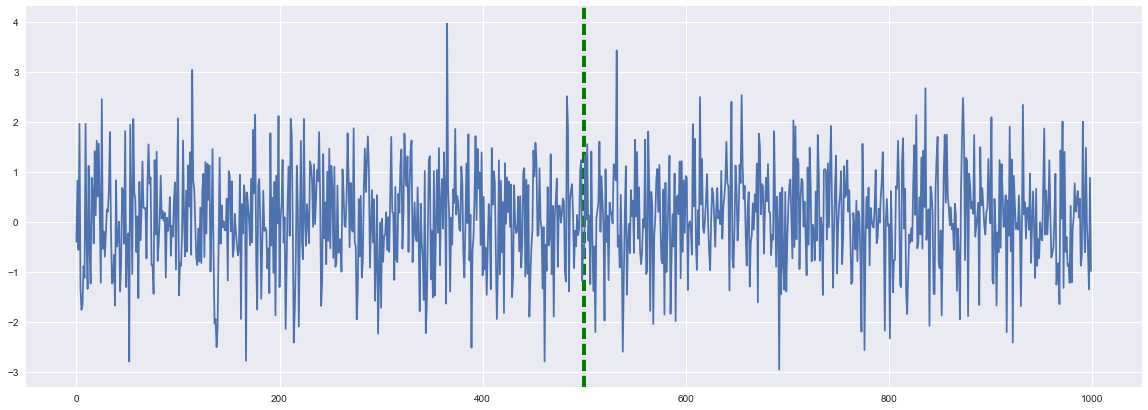

In [12]:
np.random.seed(1)

true_theta = 500
train = 200

train, test = generator_normal(0, 1, 0.1, 1, train, true_theta, 500)
plt.figure(figsize=(20, 7))
plt.axvline(x=true_theta ,color='g', linestyle='--',linewidth=4)
plt.plot(test)

# CUSUM

$$
T_n = \max\{0, T_{n-1} + \log\frac{f_1(z_n)}{f_0(z_n)}\} ,~C_0=0
$$

The task is to implement two types of CUSUM:
* Two-Sided CUSUM:
    * $f_0 = \mathcal{N}(m_0, \sigma_0)$
    * $f_1 = \mathcal{N}(m_0 \pm \delta, \sigma_0)$
* Bayes CUSUM:
    * $f_0 = \mathcal{N}(m_0, \sigma_0)$
    * $f_1(x | m_1) = \mathcal{N}(m_1, \sigma_0)$, prior distribution on $m_1$: $m_1 \sim \mathcal{N}(1, 1)$
    * In this case $f_1(x) = \int f_1(x | m_1)p(m_1)d m_1$

In [4]:
def likelihood_ratio(train, kind='two-sided'):
    """
    Computes likelihood ratio function.
    train: np.array with train samples for estimation f_0
    kind: str, 'two-sided' or 'bayes'
    """
    
    assert kind in ('two-sided', 'bayes')
    
    f_0 = norm(np.mean(train), np.std(test) ** 2).pdf # call as f_0(x)
    
    if kind == 'two-sided':
        lr_pos = np.zeros_like(test)
        lr_neg = np.zeros_like(test)
        # your code here
        return lr_pos, lr_neg
    else:
        lr = np.zeros_like(test)
        # your code here
        return lr
    

def CUSUM(test, lr):
    """
    test: np.array with test samples
    lr: likelyhood ratio function
    """    
    
    cs = np.zeros_like(test)
    
    # your code here
    
    return cs

Plot the result statistics

In [5]:
lr_neg, lr_pos = likelihood_ratio(train, kind='two-sided')
lr_bayes = likelihood_ratio(train, kind='bayes')

cusum_pos = CUSUM(test, lr=lr_pos)
cusum_neg = CUSUM(test, lr=lr_neg)
cusum_neg = CUSUM(test, lr=lr_bayes)

# your code here

Our next goal is to select the threshold $h$ s.t. $\tau = \min\{t: T_n > h\}$. Depending on the selected threshold, we will obtain different Probabilities of false alarm $\mathbb{P}(\tau < \theta)$.

The less the probability of false alarm, the more the mean delay $\mathbb{E}[\tau - \theta | \tau > \theta]$.
Plot the dependancy of Probability of false alarm from mean delay (variing the value of threshold $h$).

In [6]:
# your code here (use value true_theta for testing)
true_theta

500

# Shiryaev-Roberts

$$R_n = (1 + R_{n-1}) \frac{f_1(z_n)}{f_0(z_n)}$$

The task is the same, as for CUSUM:
* Implement S-R algorithm;
* Plot the dependancy of probability of false alarm from mean delay.

In [7]:
def S_R(test, lr):
    """
    test: np.array with test samples
    lr: likelyhood ratio function
    """    
    
    sr = np.zeros_like(test)
    
    # your code here
    
    return sr

Plot the dependancy of probability of false alarm from mean delay for both CUSUM and S-R. Compare their AUC.

In [8]:
# your code here

What if Var changed?

Remember the formula $Var(X) = \mathbb{E}X^2 - (\mathbb{E}X)^2$. 

In [9]:
# you code here

# Let's construt an algorithm for real-like data

Here is your data in files i.txt, $i \in [0, 4]$. Below there are plots with true change-point (from files_changepoints dict).

### Your goal is to construct an universal algorithm for change-point detection. 
### The probability of false alarm should not exceed 10%(!!!)
There should be only one algorithm for all the data.
Note, that the data is not i.i.d..

Remember everything you know:
* How can we be closer to an i.i.d. assumption ?
* CUSUM? S-R? What Distribution?
* Exponential smoothness

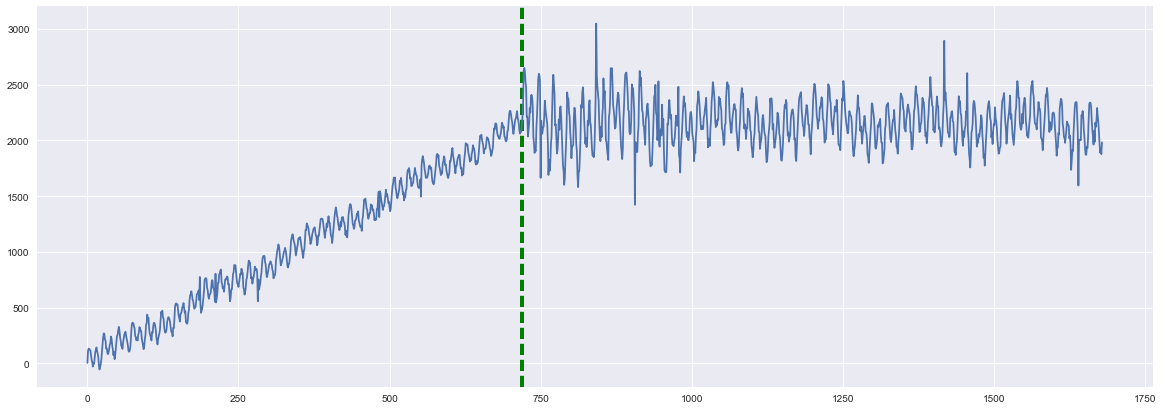

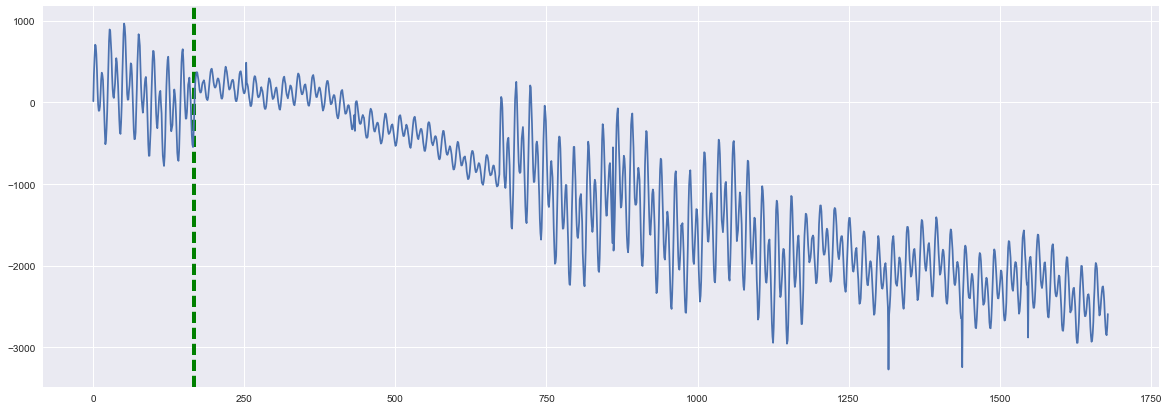

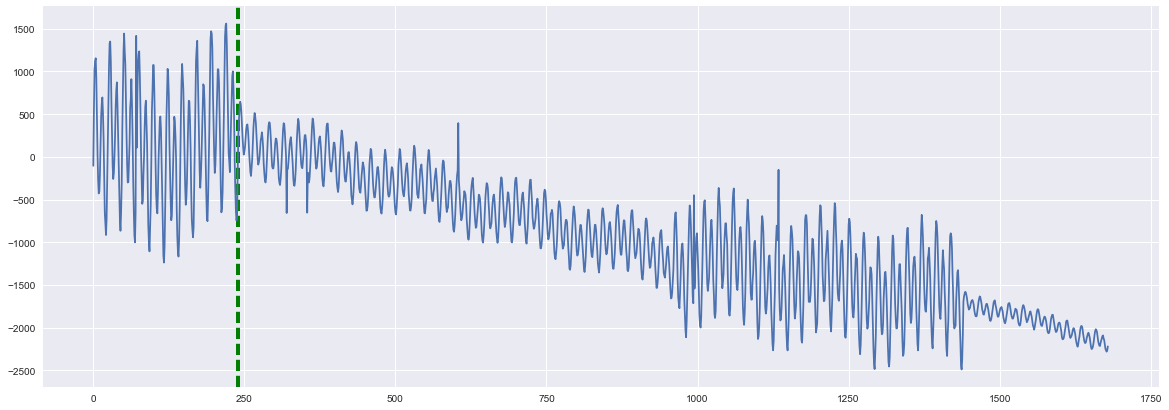

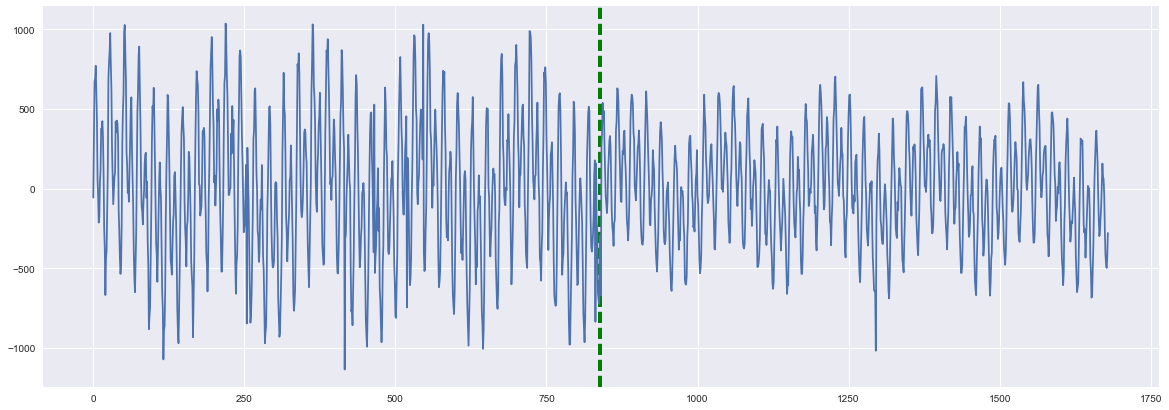

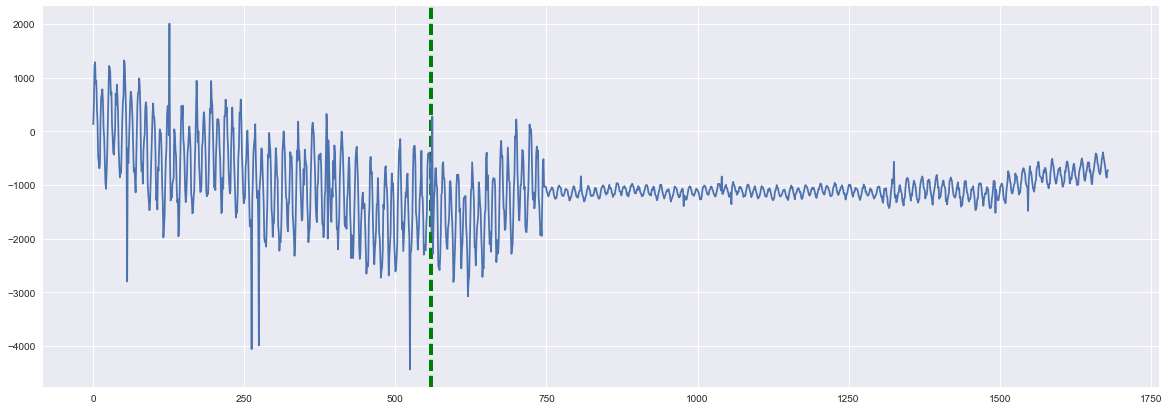

In [10]:
import pandas as pd


files_changepoints = {
    '0.txt': 719,
    '1.txt': 167,
    '2.txt': 239,
    '3.txt': 839,
    '4.txt': 559
}

for f_name, change_point in files_changepoints.items():
    sig = np.loadtxt(f_name)
    plt.figure(figsize=(20, 7))
    plt.axvline(x=change_point ,color='g', linestyle='--',linewidth=4)
    plt.plot(sig)

Implement the function get_changepoint with your algorithm.

Mean Delay is inf


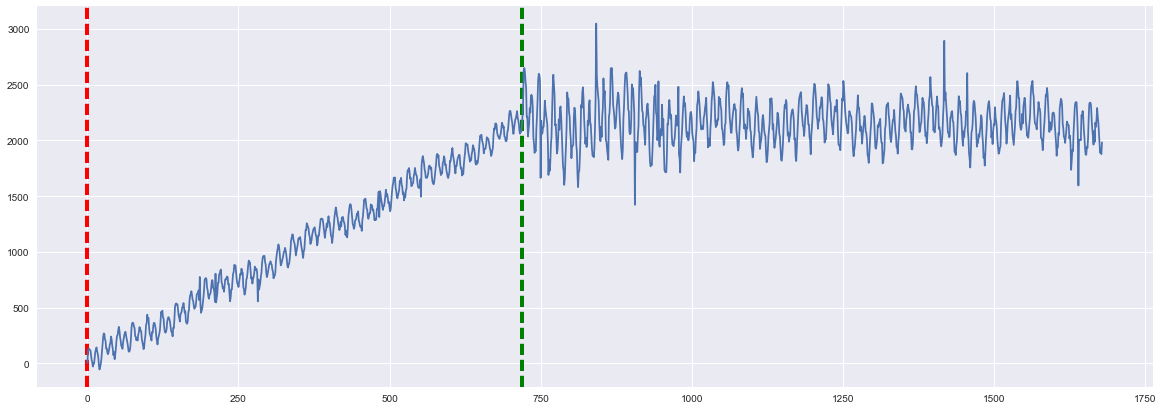

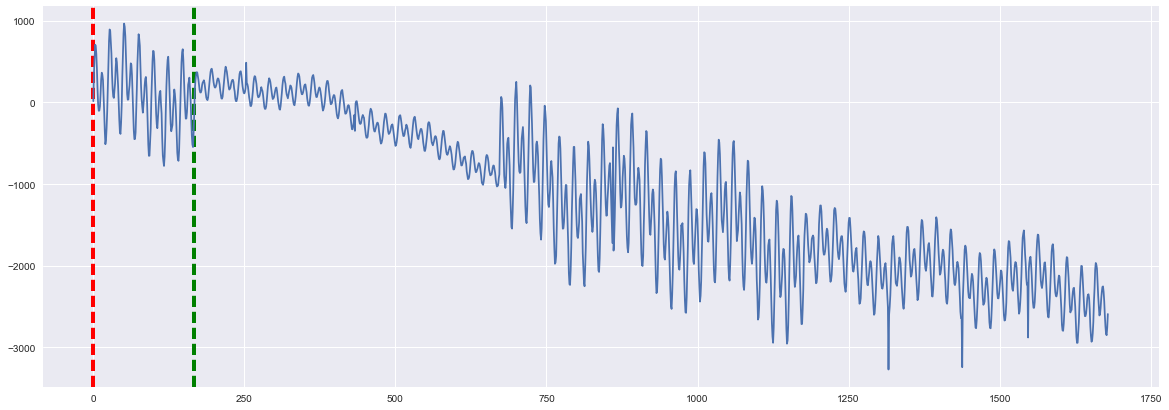

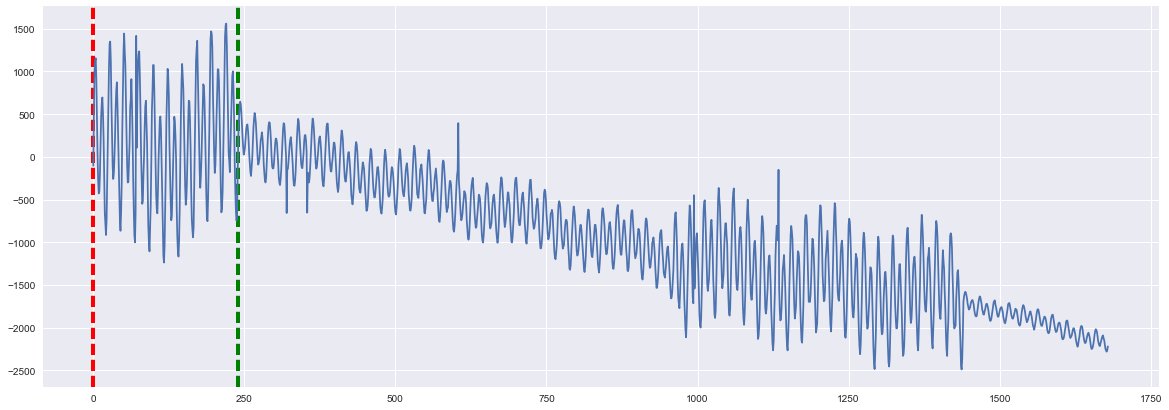

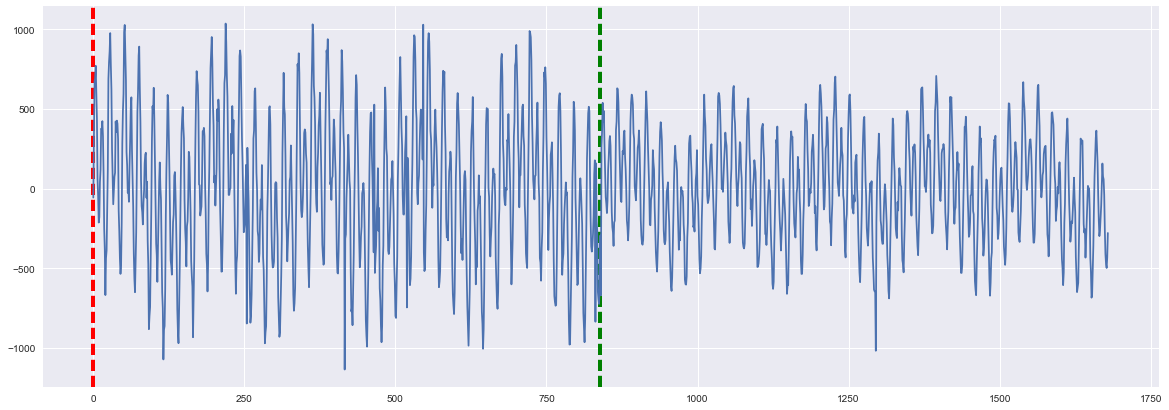

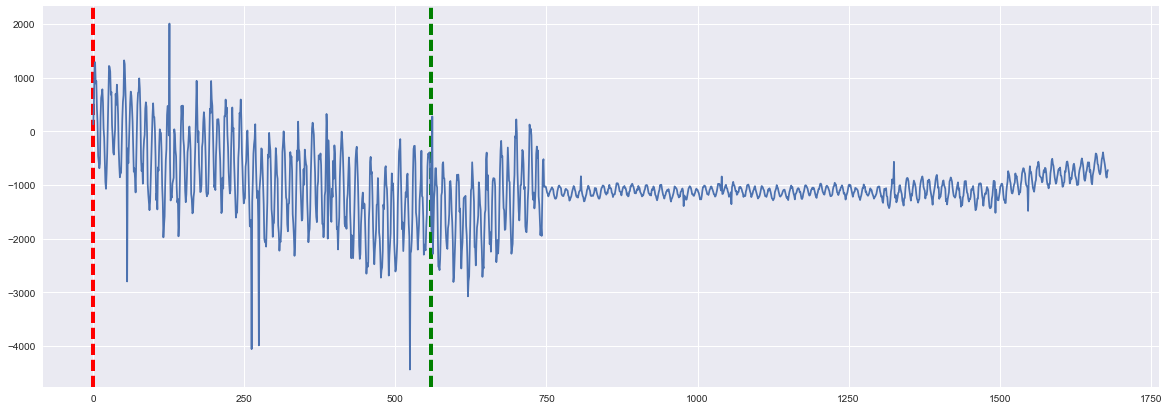

In [11]:
def get_changepoint(sig):
    # your code here
    return 0

total_error = []
for f_name, change_point in files_changepoints.items():
    sig = np.loadtxt(f_name)
    predict_cp = get_changepoint(sig)
    
    total_error.append(predict_cp - change_point if change_point < predict_cp else np.inf)
    
    plt.figure(figsize=(20, 7))
    plt.axvline(x=change_point ,color='g', linestyle='--',linewidth=4)
    plt.axvline(x=predict_cp ,color='r', linestyle='--',linewidth=4)
    plt.plot(sig)
    
print('Mean Delay is', np.mean(total_error))
